In [38]:
!pip install --upgrade pip

In [3]:
!pip install pandas
!pip install numpy
!pip install seaborn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
import statistics

In [39]:
import io
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df_bostonhousing = pd.read_csv(URL)

In [17]:
df_bostonhousing.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [21]:
df_bostonhousing.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


Text(0.5, 1.0, 'Median for owner-occupied homes')

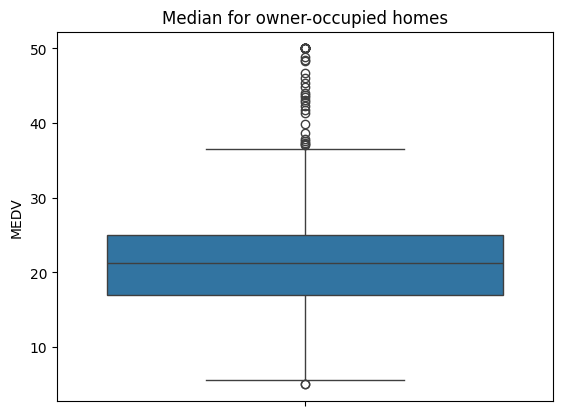

In [22]:
a1 = sns.boxplot (y = "MEDV", data=df_bostonhousing)
a1.set_title('Median for owner-occupied homes')

Text(0.5, 1.0, 'Charles river var')

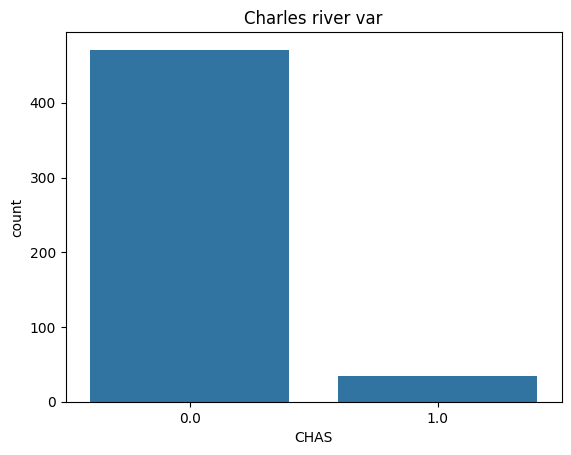

In [23]:
a2 = sns.countplot (x="CHAS", data = df_bostonhousing)
a2.set_title('Charles river var')

[Text(0.5, 0, 'Owner-occupied houses built earlier than 1940'),
 Text(0, 0.5, 'Median value of owner-occupied homes in $1K'),
 Text(0.5, 1.0, 'MEDV variable vs the AGE variable.')]

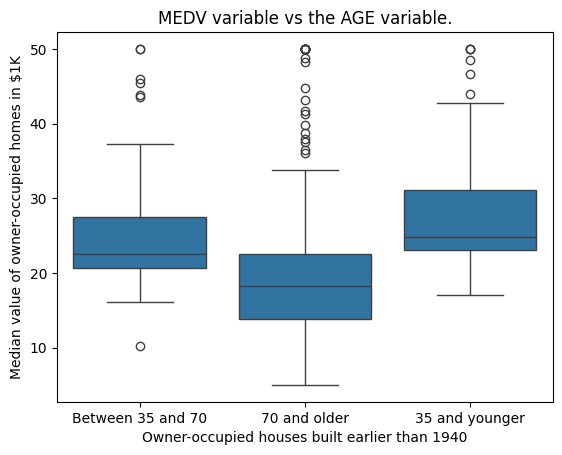

In [40]:
df_bostonhousing.loc[df_bostonhousing['AGE'] <= 35, 'Age_Group'] = "35 and younger"
df_bostonhousing.loc[(df_bostonhousing['AGE'] > 35) & (df_bostonhousing['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
df_bostonhousing.loc[(df_bostonhousing['AGE'] >= 70), 'Age_Group'] = "70 and older"

a3 = sns.boxplot(x = 'Age_Group', y = 'MEDV', data = df_bostonhousing)
a3.set(xlabel = "Owner-occupied houses built earlier than 1940"
           , ylabel = "Median value of owner-occupied homes in $1K"
           , title = "MEDV variable vs the AGE variable.")


[Text(0.5, 0, 'Nitric oxides concentration, parts per 10 million'),
 Text(0, 0.5, 'Proportion of non-retail business acres per town'),
 Text(0.5, 1.0, 'MEDV var vs the AGE var')]

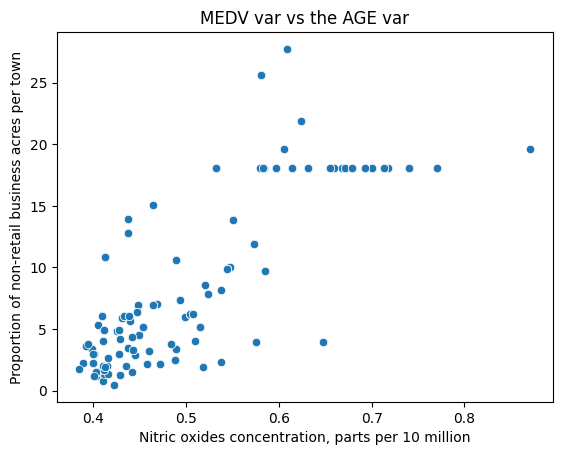

In [42]:
a4 = sns.scatterplot (x= "NOX", y= "INDUS", data = df_bostonhousing)
a4.set(xlabel = "Nitric oxides concentration, parts per 10 million"
           , ylabel = "Proportion of non-retail business acres per town"
           , title = "Relationship between NOX and INDUS")

In [31]:
Non_Riverside = df_bostonhousing.loc[(df_bostonhousing['CHAS'] == 0), 'CHAS_T'] = 'Non-Riverside'
Riverside = df_bostonhousing.loc[(df_bostonhousing['CHAS'] == 1), 'CHAS_T'] = 'Riverside'


[Text(0.5, 0, 'Pupil to Teacher Ratio'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Pupil to Teacher Ratio (PTRATIO)')]

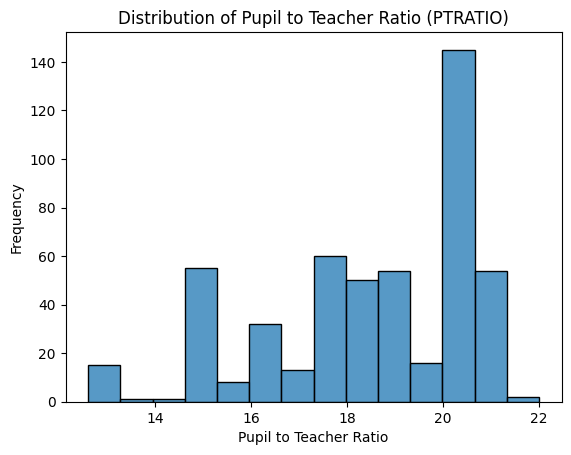

In [46]:
a5 = sns.histplot(x = 'PTRATIO', data = df_bostonhousing)
a5.set(xlabel = "Pupil to Teacher Ratio"
             , ylabel = "Frequency"
            , title = "Distribution of Pupil to Teacher Ratio (PTRATIO)")

In [32]:
scipy.stats.ttest_ind(df_bostonhousing[df_bostonhousing['CHAS_T'] == 'Non-Riverside']['MEDV'],
                      df_bostonhousing[df_bostonhousing['CHAS_T'] == 'Riverside']['MEDV'], equal_var = True)

TtestResult(statistic=np.float64(-3.996437466090509), pvalue=np.float64(7.390623170519905e-05), df=np.float64(504.0))

p-value < 0.05 -> reject  H0. There is no significant difference in the median value between the houses located on the Riverside of Charles River vs those further away.

In [33]:
df_bostonhousing.loc[df_bostonhousing['AGE'] <= 35, 'Age_Group'] = "people up to 35 years old"
df_bostonhousing.loc[(df_bostonhousing['AGE'] > 35) & (df_bostonhousing['AGE'] < 70), 'Age_Group'] = "people between 35 & 70 years old"
df_bostonhousing.loc[(df_bostonhousing['AGE'] >= 70), 'Age_Group'] = "people over 70 years old"


In [35]:
age_below_35 = df_bostonhousing[df_bostonhousing['Age_Group'] == "people up to 35 years old"]['MEDV']
age_35_70 = df_bostonhousing[df_bostonhousing['Age_Group'] == "people between 35 & 70 years old"]['MEDV']
age_above_70 = df_bostonhousing[df_bostonhousing['Age_Group'] == "people over 70 years old"]['MEDV']

In [36]:
f_statistic, p_value = scipy.stats.f_oneway(age_below_35, age_35_70, age_above_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


p-value  <  alpha (0.05) ->  reject the H0. The median value of houses varies across different proportions of owner-occupied units built before 1940.

In [ ]:
scipy.stats.pearsonr(df_bostonhousing['NOX'], df_bostonhousing['INDUS'])

(0.763651446920915, 7.913361061242082e-98)

p-value < 0.05 -> reject H0. The relationship exists between nitric oxide concentrations & proportion of non-retail business acres per town.

In [37]:
X = df_bostonhousing['DIS']
y = df_bostonhousing['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        16:57:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 p-value < alpha level (0.05) -> reject the H0. Impact in the median value of  houses occupied by owners.